# Prepping data

In [2]:
from xgcm import Grid
import pop_tools
import gcsfs
import fsspec as fs
import numpy as np
import xesmf as xe
import xarray as xr
import random
import matplotlib.pyplot as plt
import importlib
import preprocessing

import warnings
warnings.filterwarnings("ignore")

importlib.reload(preprocessing)
from preprocessing import preprocess_data

In [3]:
ds_merged = preprocess_data()
ds_merged

Load Data
Interpolating ocean velocities
Modify units
Load Data
Align in time
Interpolating ocean velocities
Regrid Atmospheric Data
Modify units
Mask nans
Calculate relative wind


<xarray.Dataset> Size: 3TB
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 58kB 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.85 79.95
  * yt_ocean      (yt_ocean) float64 22kB -81.11 -81.07 -81.02 ... 89.94 89.98
    area_t        (yt_ocean, xt_ocean) float64 78MB dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dxt           (yt_ocean, xt_ocean) float64 78MB dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyt           (yt_ocean, xt_ocean) float64 78MB dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_t      (yt_ocean, xt_ocean) float32 39MB dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_t      (yt_ocean, xt_ocean) float32 39MB dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ht            (yt_ocean, xt_ocean) float32 39MB dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmt           (yt_ocean, xt_ocean) float32 39MB dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    wet           (yt_ocean, xt_ocean) float64 78MB dask.array<chunksize=(2700, 3600), meta=np.ndarray>
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 284GB dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 284GB dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 284GB dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 284GB dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 284GB dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 284GB dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 284GB dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 284GB dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 284GB dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 284GB dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 284GB dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

# Demonstrate that xrft can return original data after forward/inverse Fourier transform

In [4]:
import xrft

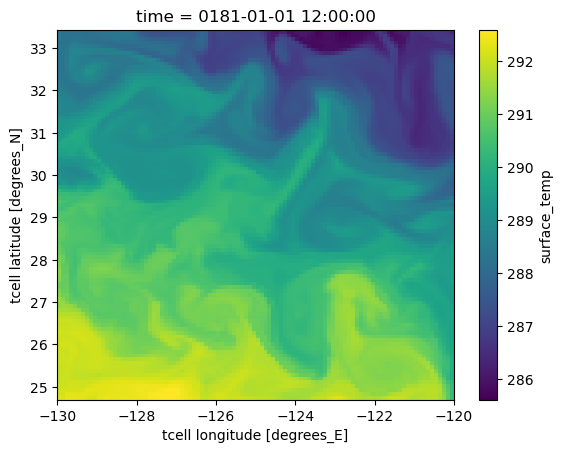

In [5]:
ds_test = ds_merged.isel(time=0, xt_ocean=slice(1500, 1600), yt_ocean=slice(1500, 1600))
ds_test.surface_temp.plot()

In [6]:
SST = ds_test.surface_temp
ds_finalTest = SST.drop(['area_t', 'dxt', 'dyt', 'geolat_t', 'geolon_t', 'ht', 'kmt', 'wet'])
ds_finalTest

<xarray.DataArray 'surface_temp' (yt_ocean: 100, xt_ocean: 100)> Size: 40kB
dask.array<getitem, shape=(100, 100), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
    time      object 8B 0181-01-01 12:00:00
  * xt_ocean  (xt_ocean) float64 800B -130.0 -129.9 -129.8 ... -120.2 -120.1
  * yt_ocean  (yt_ocean) float64 800B 24.74 24.83 24.92 ... 33.22 33.3 33.38

In [7]:
y_beg = ds_finalTest.yt_ocean[0]
y_end = ds_finalTest.yt_ocean[-1]
y_len = len(ds_finalTest.yt_ocean)
yt_new = np.linspace(y_beg, y_end, y_len)
yt_new

array([24.74302801, 24.83030239, 24.91757678, 25.00485117, 25.09212556,
       25.17939995, 25.26667433, 25.35394872, 25.44122311, 25.5284975 ,
       25.61577189, 25.70304628, 25.79032066, 25.87759505, 25.96486944,
       26.05214383, 26.13941822, 26.2266926 , 26.31396699, 26.40124138,
       26.48851577, 26.57579016, 26.66306455, 26.75033893, 26.83761332,
       26.92488771, 27.0121621 , 27.09943649, 27.18671087, 27.27398526,
       27.36125965, 27.44853404, 27.53580843, 27.62308282, 27.7103572 ,
       27.79763159, 27.88490598, 27.97218037, 28.05945476, 28.14672915,
       28.23400353, 28.32127792, 28.40855231, 28.4958267 , 28.58310109,
       28.67037547, 28.75764986, 28.84492425, 28.93219864, 29.01947303,
       29.10674742, 29.1940218 , 29.28129619, 29.36857058, 29.45584497,
       29.54311936, 29.63039374, 29.71766813, 29.80494252, 29.89221691,
       29.9794913 , 30.06676569, 30.15404007, 30.24131446, 30.32858885,
       30.41586324, 30.50313763, 30.59041201, 30.6776864 , 30.76

In [8]:
ds_finalTest['yt_ocean'] = yt_new
ds_finalTest

<xarray.DataArray 'surface_temp' (yt_ocean: 100, xt_ocean: 100)> Size: 40kB
dask.array<getitem, shape=(100, 100), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
    time      object 8B 0181-01-01 12:00:00
  * xt_ocean  (xt_ocean) float64 800B -130.0 -129.9 -129.8 ... -120.2 -120.1
  * yt_ocean  (yt_ocean) float64 800B 24.74 24.83 24.92 ... 33.21 33.3 33.38

In [9]:
Fda = xrft.dft(ds_finalTest, dim=['xt_ocean', 'yt_ocean'], true_phase=True, true_amplitude=True).compute()
Fda.real

<xarray.DataArray (freq_yt_ocean: 100, freq_xt_ocean: 100)> Size: 80kB
array([[ 0.0314615 , -0.01736799, -0.00048955, ..., -0.00813807,
         0.00154147,  0.01641297],
       [-0.00101467, -0.0031688 ,  0.01458142, ...,  0.00983546,
         0.00297317, -0.00349447],
       [ 0.02127895, -0.02337942, -0.00164586, ..., -0.00821584,
         0.00579791, -0.00973802],
       ...,
       [ 0.0002379 , -0.00582676,  0.00355756, ..., -0.01420672,
         0.01324685,  0.02244774],
       [-0.02127895, -0.00973802,  0.00579791, ..., -0.01113551,
        -0.00164586, -0.02337942],
       [ 0.00101467, -0.00349447,  0.00297317, ..., -0.01344756,
         0.01458142, -0.0031688 ]])
Coordinates:
    time           object 8B 0181-01-01 12:00:00
  * freq_xt_ocean  (freq_xt_ocean) float64 800B -5.0 -4.9 -4.8 ... 4.7 4.8 4.9
  * freq_yt_ocean  (freq_yt_ocean) float64 800B -5.729 -5.614 -5.5 ... 5.5 5.614

#### Question: Why does the below plot only work when there are not log scales on the axes?

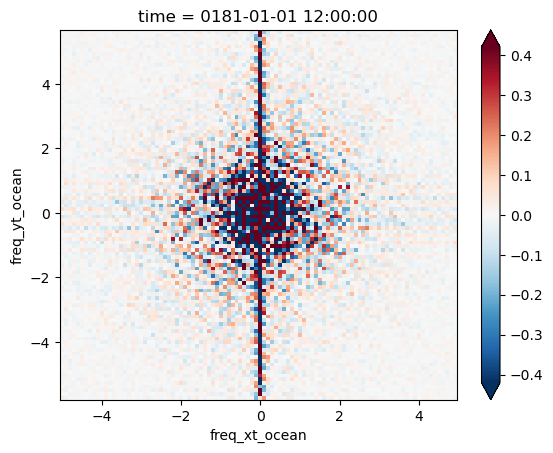

In [10]:
Fda.real.plot(robust=True)
#plt.yscale('log')
#plt.xscale('log') 

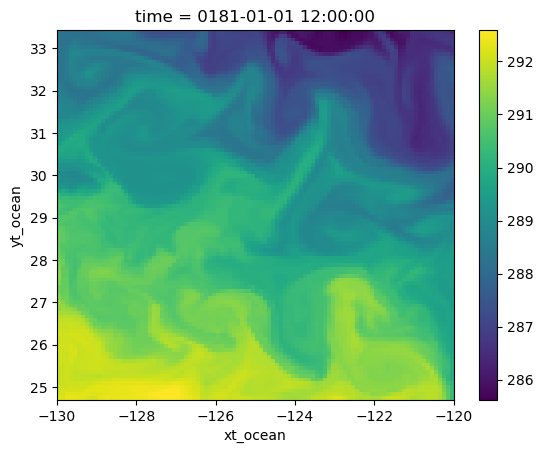

In [11]:
Fda_1 = xrft.idft(Fda, dim=["freq_xt_ocean","freq_yt_ocean"], true_phase=True, true_amplitude=True)
Fda_1.real.plot()

# Power Spectra for SST

Text(0.5, 1.0, 'SST Power Spectra')

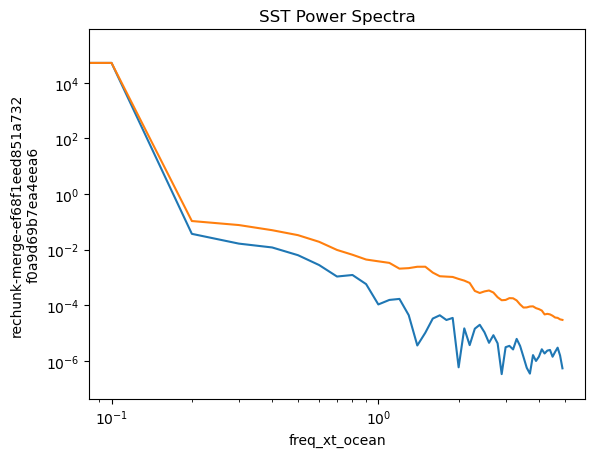

In [13]:
ps = xrft.power_spectrum(ds_finalTest.mean(dim='yt_ocean'), dim='xt_ocean', window=True)
ps1 = xrft.power_spectrum(ds_finalTest, dim='xt_ocean', window=True).mean(dim='yt_ocean')
ps.plot()
ps1.plot()
plt.yscale('log')
plt.xscale('log')
plt.title('SST Power Spectra')

In [54]:
ps

<xarray.DataArray 'rechunk-merge-7f82a64a7e06a13d620e9c30ef631adf' (
                                                                    freq_xt_ocean: 100)> Size: 800B
dask.array<mul, shape=(100,), dtype=float64, chunksize=(100,), chunktype=numpy.ndarray>
Coordinates:
    time           object 8B 0181-01-01 12:00:00
  * freq_xt_ocean  (freq_xt_ocean) float64 800B -5.0 -4.9 -4.8 ... 4.7 4.8 4.9

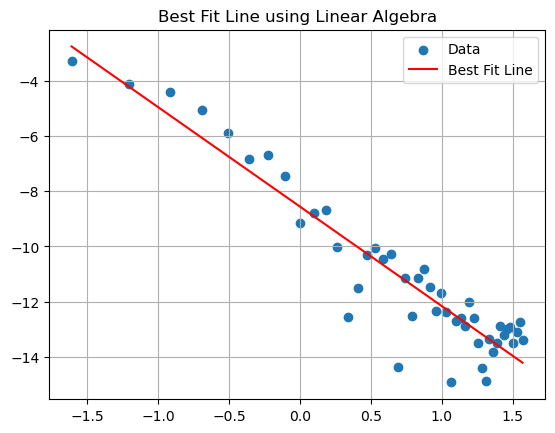

In [19]:
# Perform curve fitting
import matplotlib.pyplot as plt

x_data = np.log(ps.freq_xt_ocean)
y_data = np.log(ps)
x_data_np = x_data.values[52:-1] #log made first 51 x values nans or infs
y_data_np = y_data.values[52:-1] #51st point is an outlier

X = np.vstack((np.ones_like(x_data_np), x_data_np)).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y_data_np
beta_0, beta_1 = beta

plt.figure()
plt.scatter(x_data_np, y_data_np, label='Data')
plt.plot(x_data_np, beta_0 + beta_1 * x_data_np, 'r-', label='Best Fit Line')
plt.legend()
plt.title('Best Fit Line using Linear Algebra')
plt.grid(True)  # Add grid for better visualization
plt.show()


#### Final fit equation:

$Y = \beta_0 + \beta_1  X\\$
$Y = -8.558836190400873 + -3.599407652706688  X$

**HW: We want to find the equation that matches**

$log(\mathcal{F}(SST)) = \beta_0 + \beta_1 log(\mathcal{F}(x))$, where $x$ is a spatial coordinate. $\\$
We let $Y = log(\mathcal{F}(SST))$ and $X = log(\mathcal{F}(x))$.

# Power Spectra for u_relative

In [27]:
urel = ds_test.u_relative
ds_urel = urel.drop(['area_t', 'dxt', 'dyt', 'geolat_t', 'geolon_t', 'ht', 'kmt', 'wet'])
ds_urel

<xarray.DataArray 'u_relative' (yt_ocean: 100, xt_ocean: 100)> Size: 40kB
dask.array<getitem, shape=(100, 100), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
    time      object 8B 0181-01-01 12:00:00
  * xt_ocean  (xt_ocean) float64 800B -130.0 -129.9 -129.8 ... -120.2 -120.1
  * yt_ocean  (yt_ocean) float64 800B 24.74 24.83 24.92 ... 33.22 33.3 33.38

Text(0.5, 1.0, 'Relative Zonal Velocity (u_rel) Power Spectra')

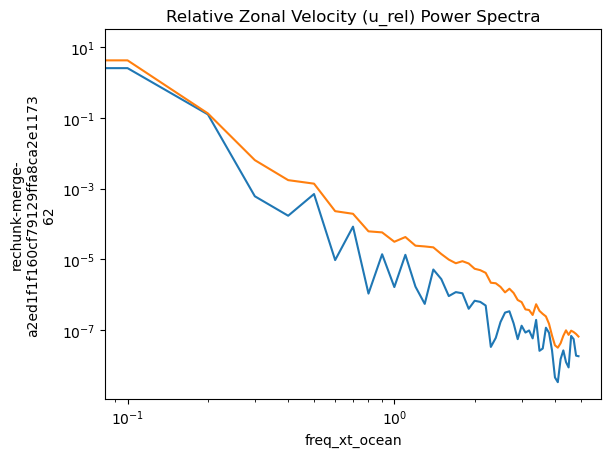

In [35]:
ps = xrft.power_spectrum(ds_urel.mean(dim='yt_ocean'), dim='xt_ocean', window=True)
ps1 = xrft.power_spectrum(ds_urel, dim='xt_ocean', window=True).mean(dim='yt_ocean')
ps.plot()
ps1.plot()
plt.yscale('log')
plt.xscale('log')
plt.title('Relative Zonal Velocity (u_rel) Power Spectra')

# Power Spectra for v_relative

In [31]:
vrel = ds_test.v_relative
ds_vrel = vrel.drop(['area_t', 'dxt', 'dyt', 'geolat_t', 'geolon_t', 'ht', 'kmt', 'wet'])
ds_vrel

<xarray.DataArray 'v_relative' (yt_ocean: 100, xt_ocean: 100)> Size: 40kB
dask.array<getitem, shape=(100, 100), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
    time      object 8B 0181-01-01 12:00:00
  * xt_ocean  (xt_ocean) float64 800B -130.0 -129.9 -129.8 ... -120.2 -120.1
  * yt_ocean  (yt_ocean) float64 800B 24.74 24.83 24.92 ... 33.22 33.3 33.38

Text(0.5, 1.0, 'Relative Meridional Velocity (v_rel) Power Spectra')

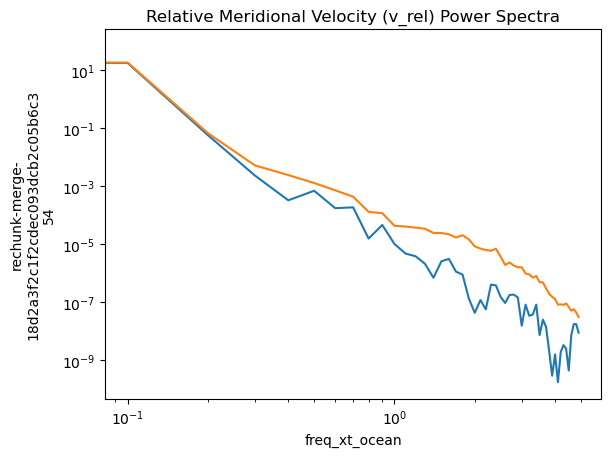

In [34]:
ps = xrft.power_spectrum(ds_vrel.mean(dim='yt_ocean'), dim='xt_ocean', window=True)
ps1 = xrft.power_spectrum(ds_vrel, dim='xt_ocean', window=True).mean(dim='yt_ocean')
ps.plot()
ps1.plot()
plt.yscale('log')
plt.xscale('log')
plt.title('Relative Meridional Velocity (v_rel) Power Spectra')

# Power Spectra for q_ref

In [33]:
qref = ds_test.q_ref
ds_qref = qref.drop(['area_t', 'dxt', 'dyt', 'geolat_t', 'geolon_t', 'ht', 'kmt', 'wet'])
ds_qref

<xarray.DataArray 'q_ref' (yt_ocean: 100, xt_ocean: 100)> Size: 40kB
dask.array<getitem, shape=(100, 100), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
    time      object 8B 0181-01-01 12:00:00
  * xt_ocean  (xt_ocean) float64 800B -130.0 -129.9 -129.8 ... -120.2 -120.1
  * yt_ocean  (yt_ocean) float64 800B 24.74 24.83 24.92 ... 33.22 33.3 33.38

Text(0.5, 1.0, 'Reference Potential Vorticity (q_ref) Power Spectra')

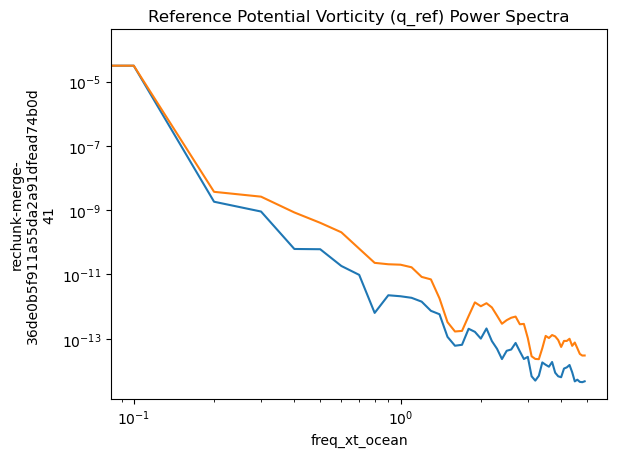

In [36]:
ps = xrft.power_spectrum(ds_qref.mean(dim='yt_ocean'), dim='xt_ocean', window=True)
ps1 = xrft.power_spectrum(ds_qref, dim='xt_ocean', window=True).mean(dim='yt_ocean')
ps.plot()
ps1.plot()
plt.yscale('log')
plt.xscale('log')
plt.title('Reference Potential Vorticity (q_ref) Power Spectra')

#### Conclusion:
It does look like smoother variables have steeper power spectra. Could this be because they are more evenly spread across scales?